In [3]:
!git clone https://github.com/meituan/YOLOv6

Cloning into 'YOLOv6'...
remote: Enumerating objects: 2543, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 2543 (delta 0), reused 1 (delta 0), pack-reused 2540
Receiving objects: 100% (2543/2543), 32.91 MiB | 33.36 MiB/s, done.
Resolving deltas: 100% (1407/1407), done.


In [4]:
%cd YOLOv6
!pip install -r requirements.txt

/content/YOLOv6
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 28.7 MB/s 
     |████████████████████████████████| 2.0 MB 59.6 MB/s 
     |████████████████████████████████| 237 kB 77.4 MB/s 
     |████████████████████████████████| 51 kB 7.3 MB/s 


In [3]:
import glob
from IPython.display import Image, display
from google.colab import files
import torch

In [4]:
torch.cuda.is_available()

True

In [1]:
!gdown 1nBx9Aj9a8cTLz9nEh3s4FqdxtmnyA6gx

Downloading...
From: https://drive.google.com/uc?id=1nBx9Aj9a8cTLz9nEh3s4FqdxtmnyA6gx
To: /content/YoloV6_Chess.zip
100% 17.5M/17.5M [00:00<00:00, 60.4MB/s]


In [2]:
!unzip YoloV6_Chess.zip

Archive:  YoloV6_Chess.zip
   creating: images/
   creating: images/test/
  inflating: images/test/0b47311f426ff926578c9d738d683e76_jpg.rf.40183eae584a653181bbd795ba3c353f.jpg  
  inflating: images/test/1c0060ef868bdc326ce5e6389cb6732f_jpg.rf.f02cd668d26a53d9bf001497992b3657.jpg  
  inflating: images/test/2f6fb003bb89cd401322a535acb42f65_jpg.rf.66c0a46773a9cd583fb96c3df41a9e0c.jpg  
  inflating: images/test/410993714e325a1de3e394ffe860df3a_jpg.rf.657c49ca295ef54da23469189070a075.jpg  
  inflating: images/test/4e3117459d759798537eb52cf5bf534d_jpg.rf.ec961b62d4b0e131fae760ed1f80836b.jpg  
  inflating: images/test/5a35ba2ec3e0d0b2b12b1758a8ac29aa_jpg.rf.9dbdb057f6533c0c09c0eda0747fbc9e.jpg  
  inflating: images/test/654bb8835258b26c466b1c19893df451_jpg.rf.55fb7f23a4422a80793f01e152fabe4d.jpg  
  inflating: images/test/685b860d412b91f5d4f7f9e643b84452_jpg.rf.2d78193e4021ae5ffb49ecd1060bebd7.jpg  
  inflating: images/test/73a38a5c8f8f1b09f093f304660d5326_jpg.rf.65192fc4204952bfd1121ee212aad

In [7]:
!python tools/train.py --batch 16 --conf configs/yolov6m.py --epochs 100 --img-size 416  --data data.yaml --device 0 --eval-interval 10

Using 1 GPU for training... 
training args are: Namespace(batch_size=16, calib=False, check_images=False, check_labels=False, conf_file='configs/yolov6m.py', data_path='data.yaml', device='0', dist_url='env://', distill=False, distill_feat=False, epochs=100, eval_final_only=False, eval_interval=10, gpu_count=0, heavy_eval_range=50, img_size=640, local_rank=-1, name='exp', output_dir='./runs/train', quant=False, rank=-1, resume=False, save_ckpt_on_last_n_epoch=-1, save_dir='runs/train/exp', stop_aug_last_n_epoch=15, teacher_model_path=None, temperature=20, workers=8, world_size=1, write_trainbatch_tb=False)

Train: Checking formats of images with 2 process(es): 
0 image(s) corrupted: 100% 606/606 [00:00<00:00, 3272.98it/s]
Train: Checking formats of labels with 2 process(es): 
606 label(s) found, 0 label(s) missing, 0 label(s) empty, 0 invalid label files: 100% 606/606 [00:00<00:00, 2710.00it/s]
Train: Final numbers of valid images: 606/ labels: 606. 
0.5s for dataset initialization.
Va

In [8]:
!python tools/eval.py --data data.yaml --weights runs/train/exp/weights/best_ckpt.pt --device 0 

Namespace(batch_size=32, conf_thres=0.03, config_file='', data='data.yaml', device='0', do_coco_metric=True, do_pr_metric=False, eval_config_file='./configs/experiment/eval_640_repro.py', force_no_pad=False, half=False, img_size=640, iou_thres=0.65, letterbox_return_int=False, name='exp', not_infer_on_rect=False, plot_confusion_matrix=False, plot_curve=True, reproduce_640_eval=False, save_dir='runs/val/', scale_exact=False, task='val', test_load_size=640, verbose=False, weights='runs/train/exp/weights/best_ckpt.pt')
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Switch model to deploy modality.
Model Summary: Params: 34.24M, Gflops: 82.03
Val: Checkin

In [9]:
!python tools/infer.py --yaml data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source images/test/ --device 0

Namespace(agnostic_nms=False, classes=None, conf_thres=0.4, device='0', half=False, hide_conf=False, hide_labels=False, img_size=[640, 640], iou_thres=0.45, max_det=1000, name='exp', not_save_img=False, project='runs/inference', save_dir=None, save_txt=False, source='images/test/', view_img=False, weights='runs/train/exp/weights/best_ckpt.pt', yaml='data.yaml')
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100% 29/29 [00:01<00:00, 23.88it/s]
Results saved to runs/inference/exp


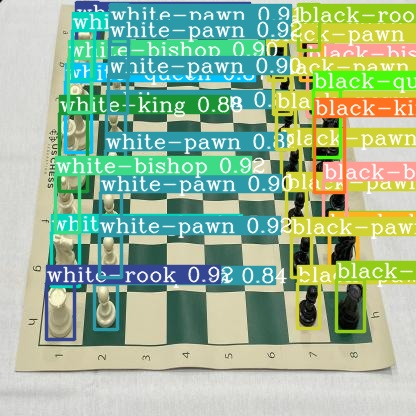

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

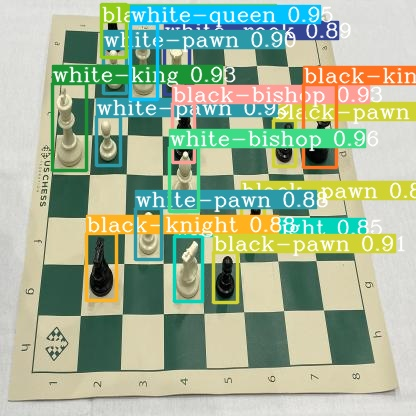

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

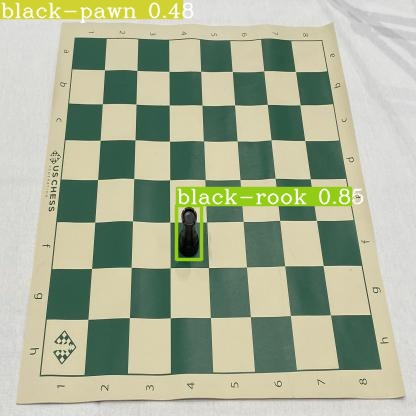

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

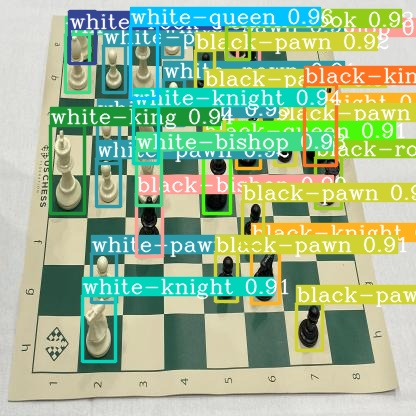

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

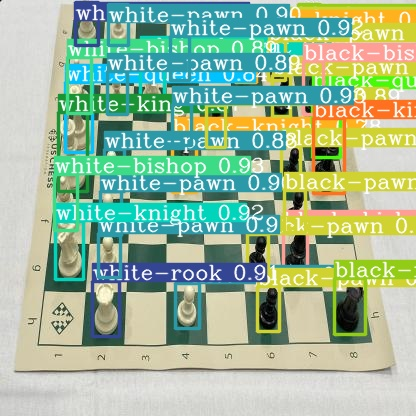

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

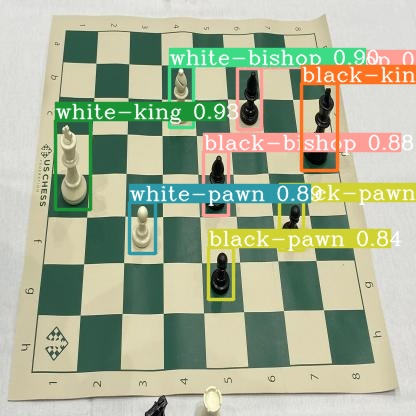

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

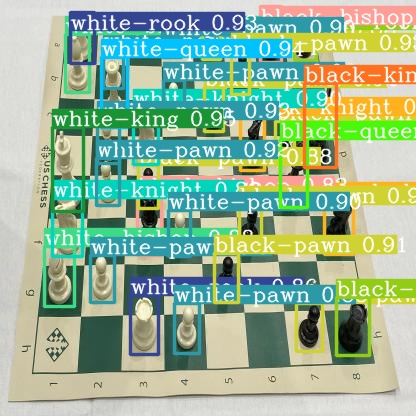

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

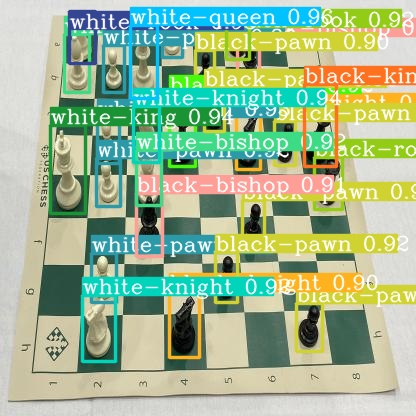

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

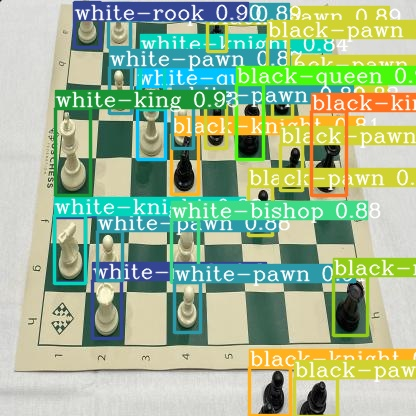

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

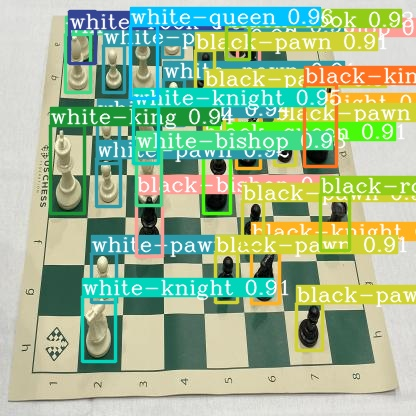

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

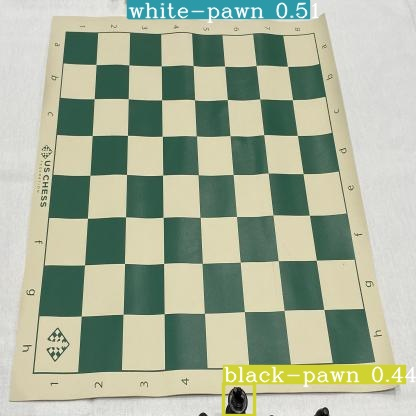

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

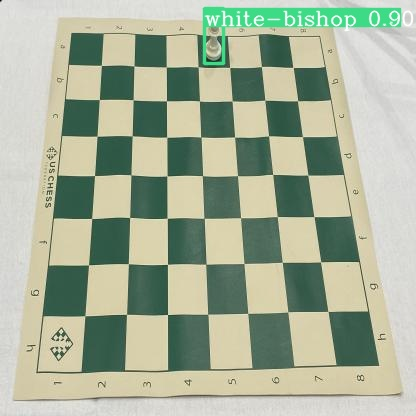

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

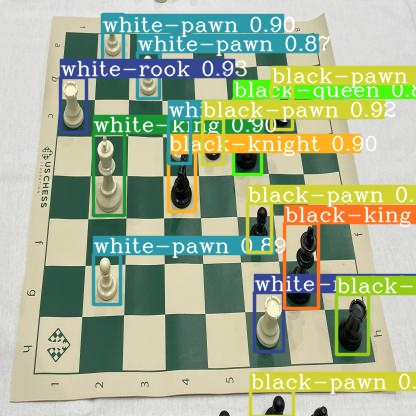

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

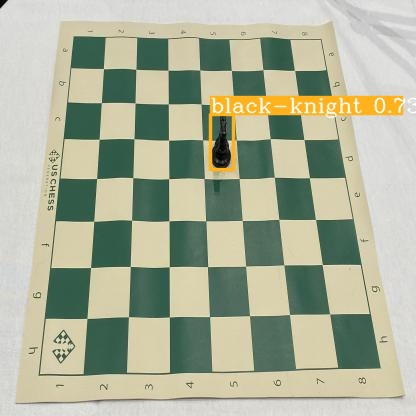

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

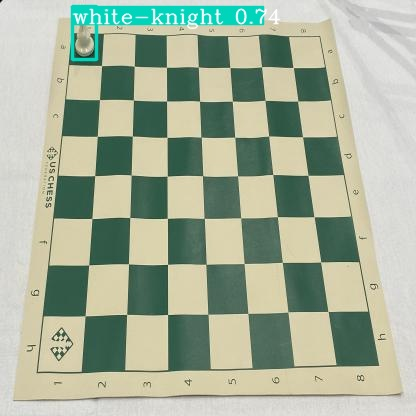

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

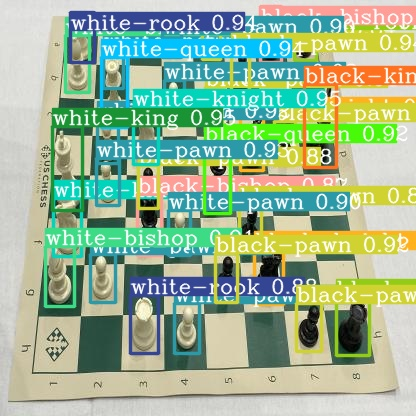

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

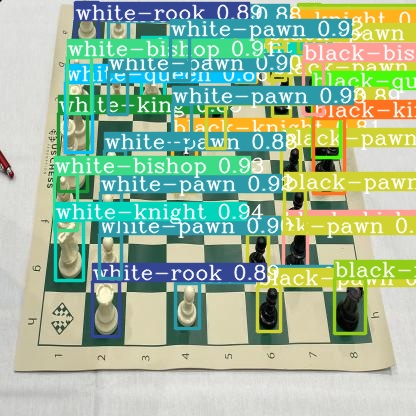

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

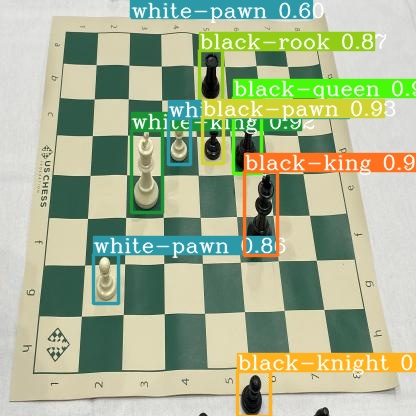

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

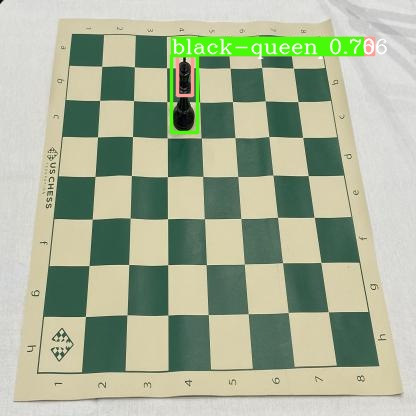

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

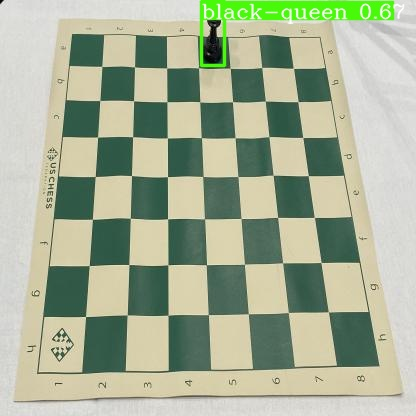

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

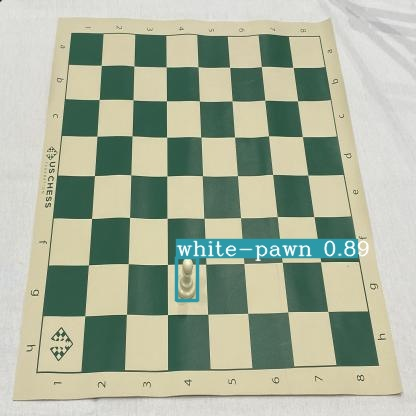

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

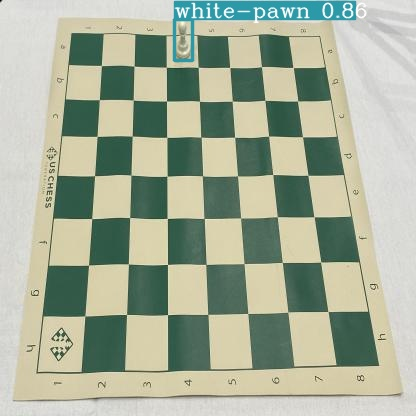

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

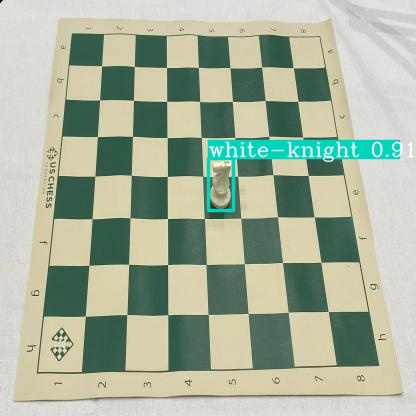

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

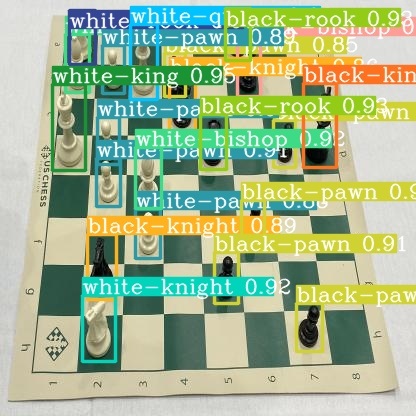

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

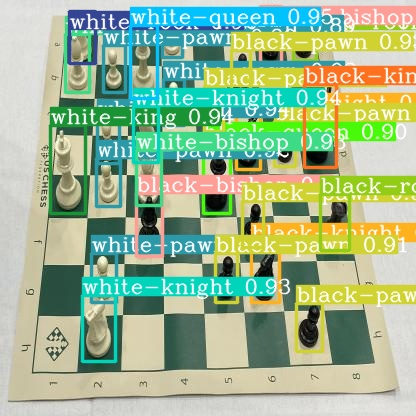

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

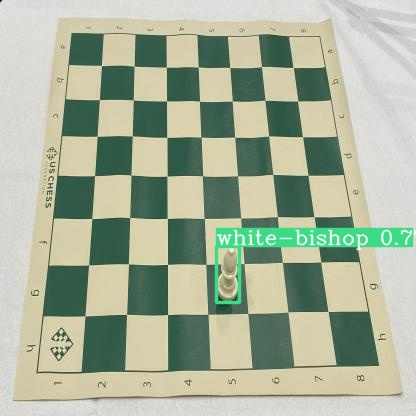

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

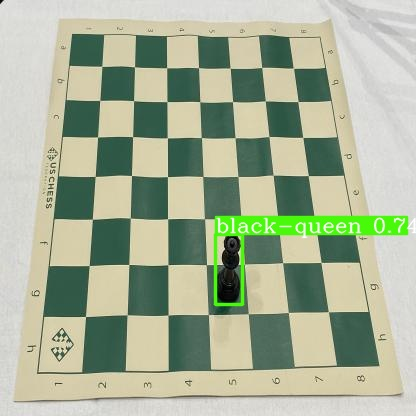

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

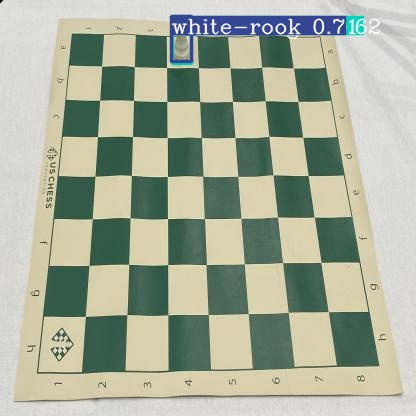

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

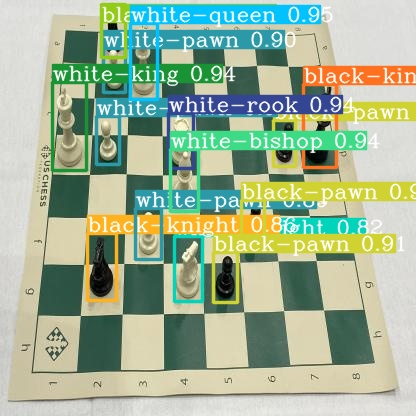

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
for imageName in glob.glob('./runs/inference/exp/*.jpg'):
      display(Image(filename=imageName))
      files.download(imageName) 
      print("\n\n")